In [1]:
# Make sure modules are reimported each time to update changes
%reload_ext autoreload
%autoreload 2

import pprint

import matplotlib.pyplot as plt


In [2]:
import yaml

with open("./example1_config.yaml", "r") as ymlfile:
    cfg = yaml.safe_load(ymlfile)

print(cfg)

{'climate': {'palaeoclimate': {'pc_excel': './example_data/climate_data/palaeoclimate_data/northern_england_palaeoclimate_from_westaway_and_younger_2013.xlsx', 'pc_sigma_ty_type': 'constant_assigned', 'pc_sigma_ty_cst': '1e3', 'pc_sigma_ty_dist': 'normal', 'pc_sigma_deltaTs_type': 'constant_assigned', 'pc_sigma_deltaTs_cst': 0.5, 'pc_sigma_deltaTs_dist': 'normal'}, 'recent_climate': {'rc_filename': 'ZonAnn.Ts+dSST', 'rc_input_csv': './example_data/climate_data/recent_climate_data/raw_data/ZonAnn.Ts+dSST.csv', 'rc_calc_folder': './example_data/climate_data/recent_climate_data/calculated_data', 'rc_sigma_ty_type': 'constant_assigned', 'rc_sigma_ty_cst': 0.5, 'rc_sigma_ty_smoothing_cutoff_cst': 'rc_sigma_ty_cst', 'rc_sigma_deltaTs_cst': 0.1, 'rc_sigma_deltaTs_smoothed_cst': 0.1, 'rc_sigma_ty_dist': 'normal', 'rc_sigma_ty_smoothing_cutoff_dist': 'normal', 'rc_sigma_deltaTs_dist': 'normal', 'rc_sigma_deltaTs_smoothed_dist': 'normal', 'rc_smoother': 'boxcar', 'rc_smoothing_length': 9}}, 'bor

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'config', 'cut_top_temperature_measurements', 'data', 'load_temperature_measurements']


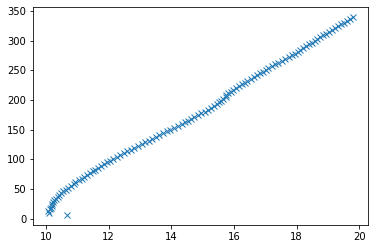

In [3]:
from BoreFlow import boreholehandler

borehole = boreholehandler.BoreHole(cfg)


print(dir(borehole))

borehole.load_temperature_measurements()

# pprint.pprint(vars(borehole.data.borehole))

# Plot to show input data
plt.plot(borehole.data.borehole.T, borehole.data.borehole.zT_m, 'x')
plt.show()

# pprint.pprint(borehole.data.borehole.T)

Cut temperature data at top of borehole

cutting
<class 'numpy.ndarray'>
<class 'float'>
[ 31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109]
here
here3
finished


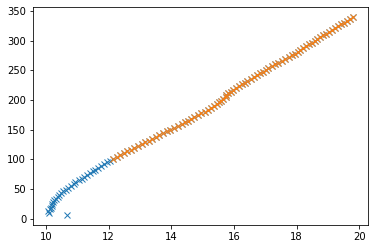

In [10]:
borehole.cut_top_temperature_measurements()

# Plot to show cut data
plt.plot(borehole.data.borehole.T, borehole.data.borehole.zT_m, 'x')
plt.plot(borehole.data.borehole.T_cut, borehole.data.borehole.zT_m_cut, 'x')
plt.show()